In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_csv('wine-quality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [79]:
df.shape

(1599, 12)

Here, we have 12 columns and 1599 rows with the target variable as "Quality".

# Checking Missing Values

In [80]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

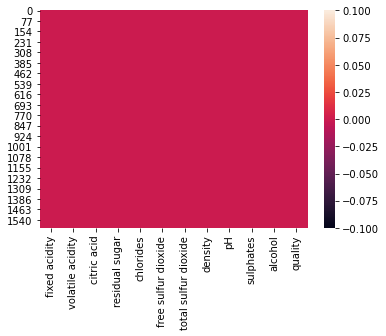

In [81]:
sns.heatmap(df.isnull())

There is no missing values in our dataset.

# Datatypes

In [82]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Here, we see that Independent Variables is of float datatype and Dependent Variable is of int datatype

# Exploring Target Variable and its Values

In [83]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [84]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Adding new column to identify Quality as Good or Bad

In [85]:
rate=[]
for i in df["quality"]:
    if i < 7:
        rate.append("0")
    else:
        rate.append("1")
    i=i+1
        

In [86]:
df["Rate"]=rate

In [87]:
df["Rate"].value_counts()

0    1382
1     217
Name: Rate, dtype: int64

In [88]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Rate                     object
dtype: object

The datatype of Rate is object. We need to change it to int.

In [89]:
df['Rate']=df['Rate'].astype(int)

In [90]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rate
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


# Data Visualization

# Correlation

<AxesSubplot:>

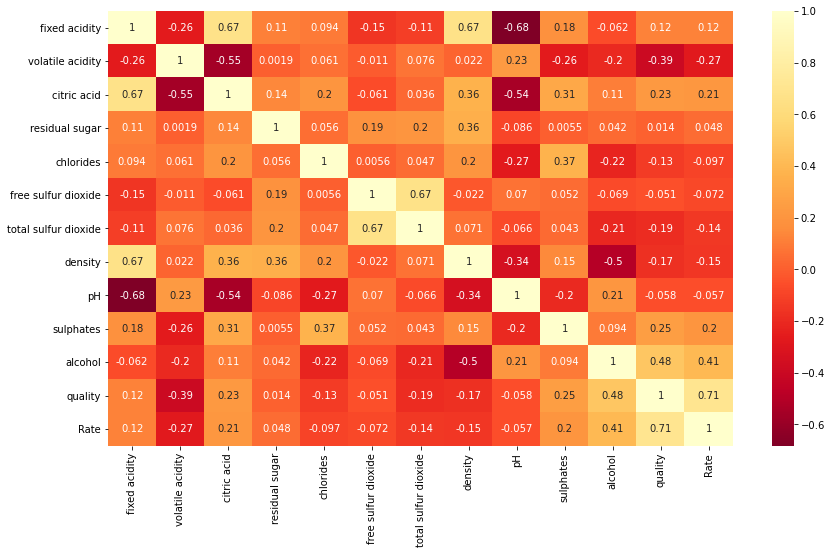

In [91]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(14,8))
sns.heatmap(df[top_features].corr(),cmap="YlOrRd_r",annot=True)

# Checking Outliers

In [92]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Rate'],
      dtype='object')

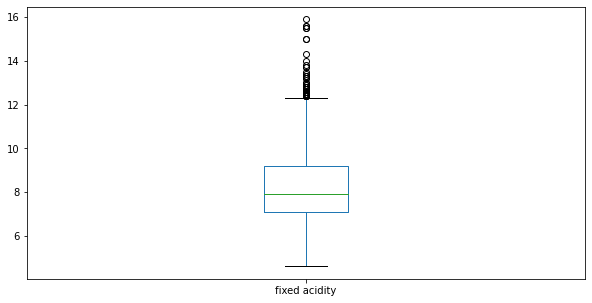

In [93]:
plt.figure(figsize=(10,5))
df['fixed acidity'].plot.box()
plt.show()

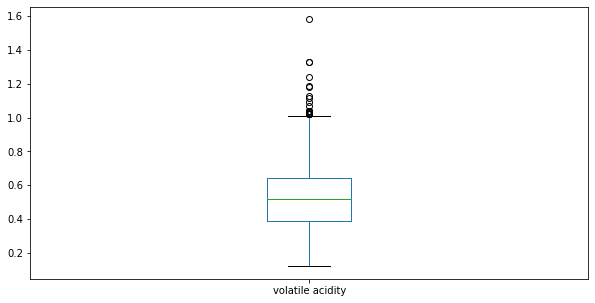

In [94]:
plt.figure(figsize=(10,5))
df['volatile acidity'].plot.box()
plt.show()

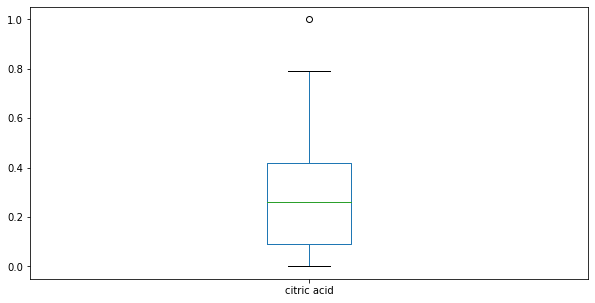

In [95]:
plt.figure(figsize=(10,5))
df['citric acid'].plot.box()
plt.show()

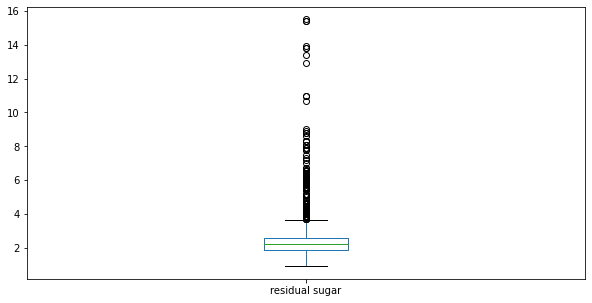

In [96]:
plt.figure(figsize=(10,5))
df['residual sugar'].plot.box()
plt.show()

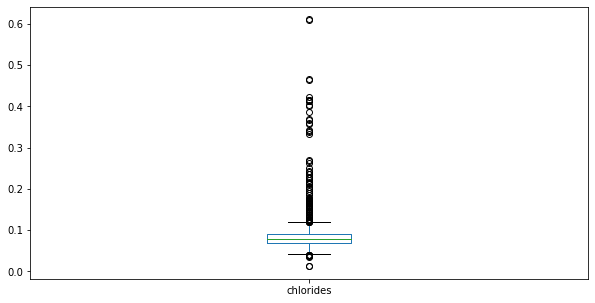

In [97]:
plt.figure(figsize=(10,5))
df['chlorides'].plot.box()
plt.show()

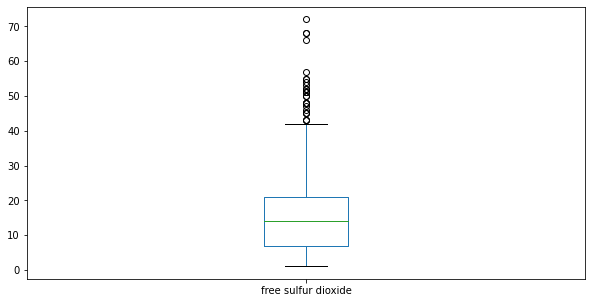

In [98]:
plt.figure(figsize=(10,5))
df['free sulfur dioxide'].plot.box()
plt.show()

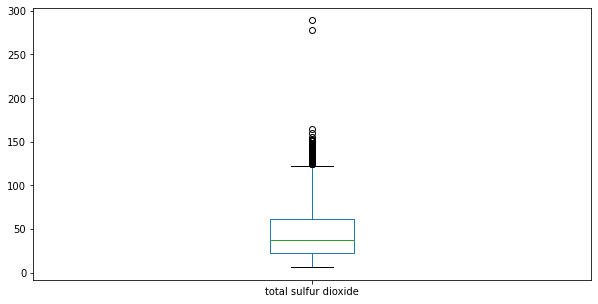

In [99]:
plt.figure(figsize=(10,5))
df['total sulfur dioxide'].plot.box()
plt.show()

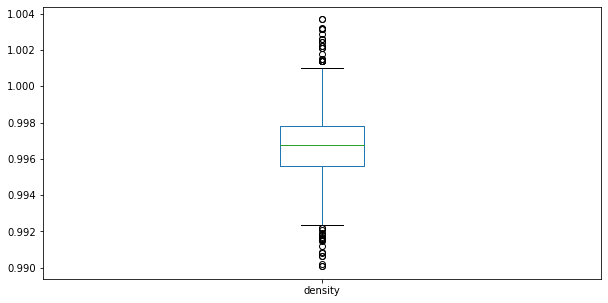

In [100]:
plt.figure(figsize=(10,5))
df['density'].plot.box()
plt.show()

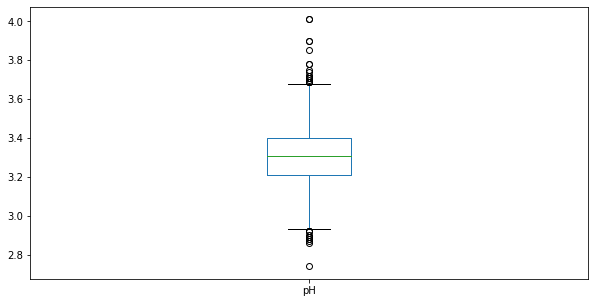

In [101]:
plt.figure(figsize=(10,5))
df['pH'].plot.box()
plt.show()

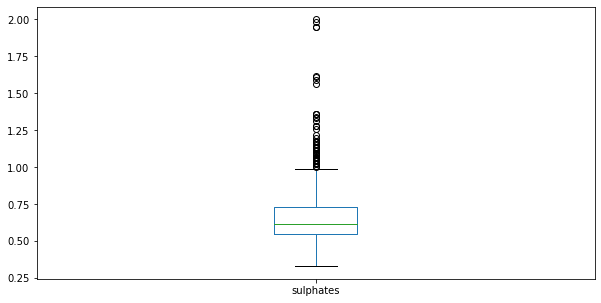

In [102]:
plt.figure(figsize=(10,5))
df['sulphates'].plot.box()
plt.show()

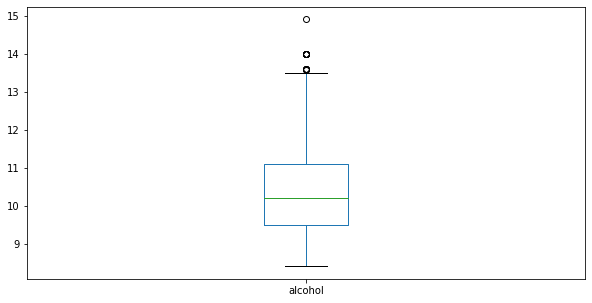

In [103]:
plt.figure(figsize=(10,5))
df['alcohol'].plot.box()
plt.show()

# Normal Distribution Curve

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

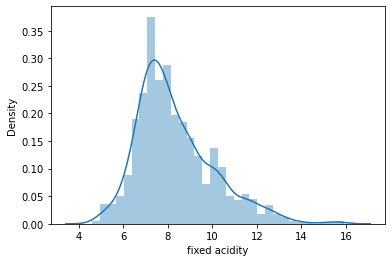

In [104]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

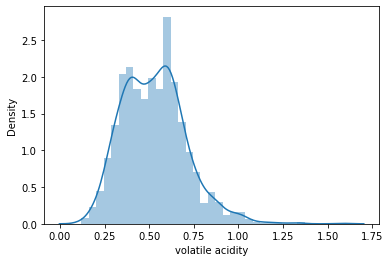

In [105]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

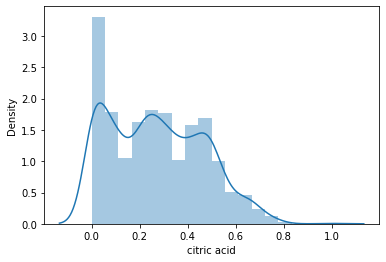

In [106]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

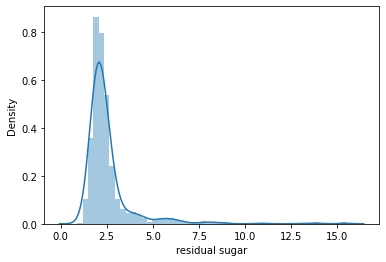

In [107]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

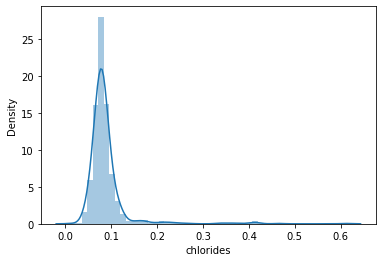

In [108]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

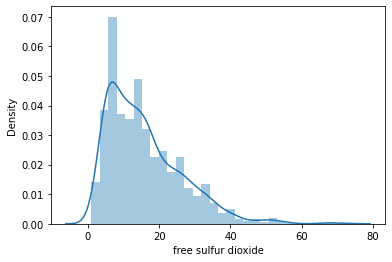

In [109]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

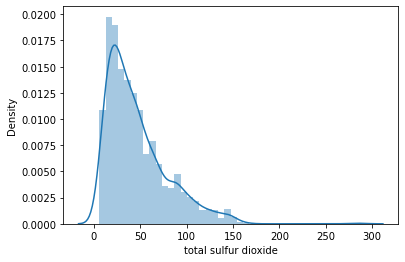

In [110]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

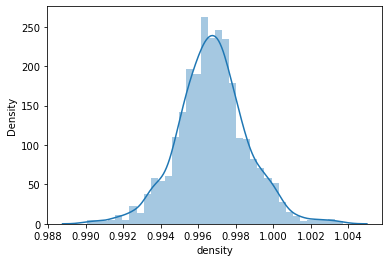

In [111]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

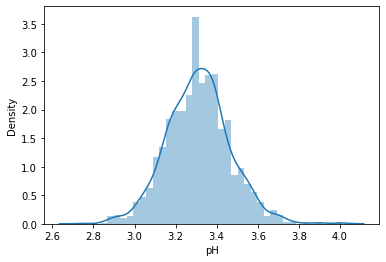

In [112]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

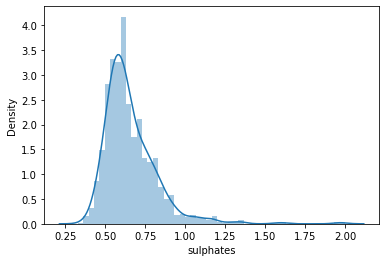

In [113]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

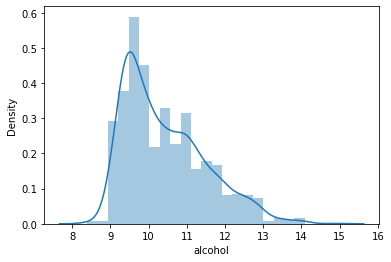

In [114]:
sns.distplot(df['alcohol'])

In [115]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
Rate                    2.129363
dtype: float64

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

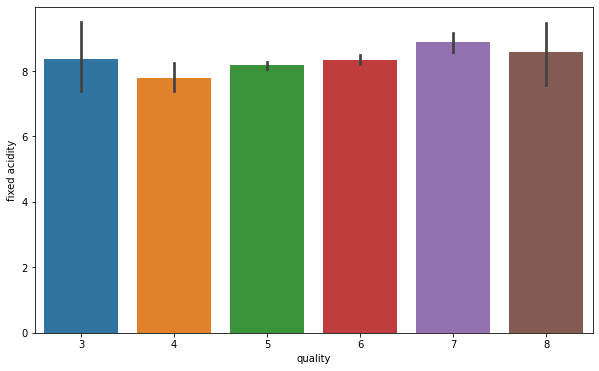

In [116]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

Here we see that fixed acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

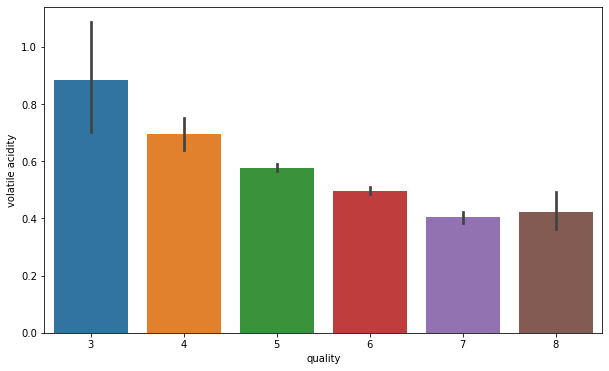

In [117]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

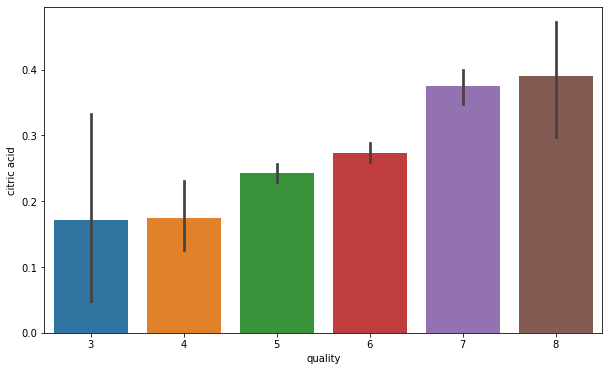

In [118]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

Composition of citric acid go higher as we go higher in the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

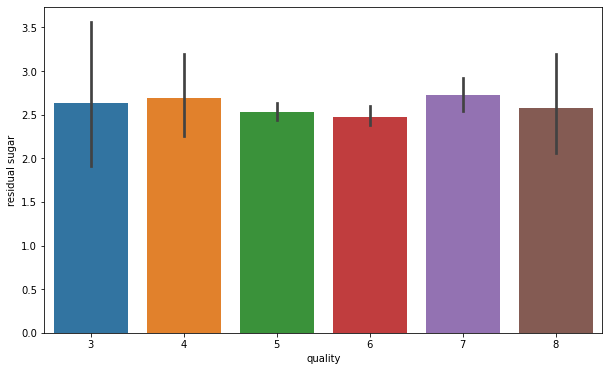

In [119]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

Residual sugar also does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

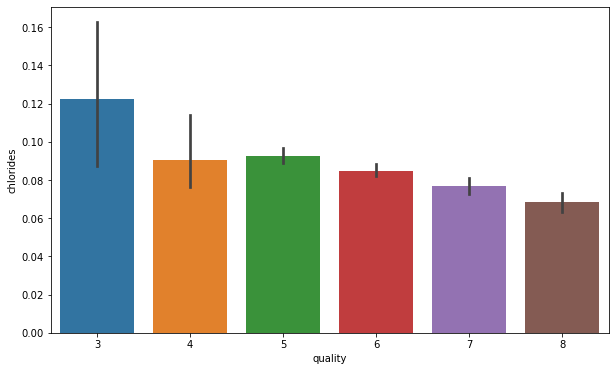

In [120]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

Composition of chloride also go down as we go higher in the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

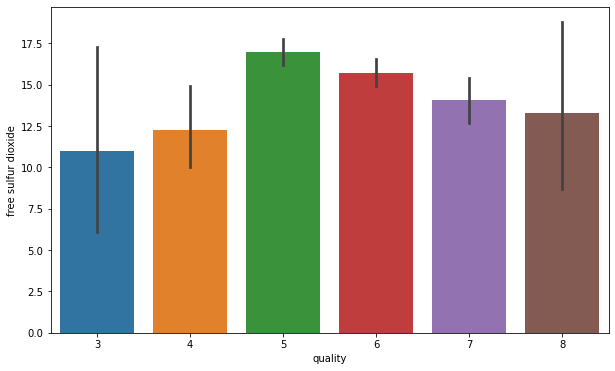

In [121]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

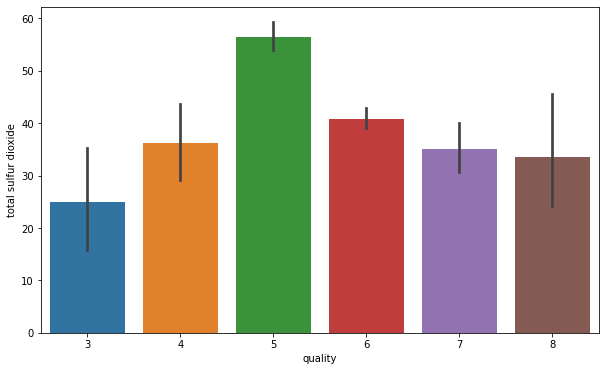

In [122]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

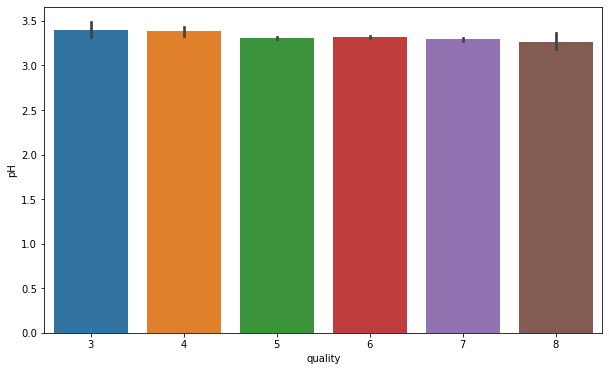

In [123]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

pH value is not giving any specification to classify the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

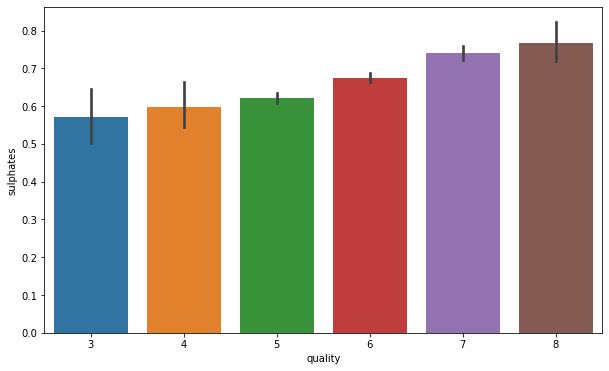

In [124]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

Sulphates level goes higher with the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

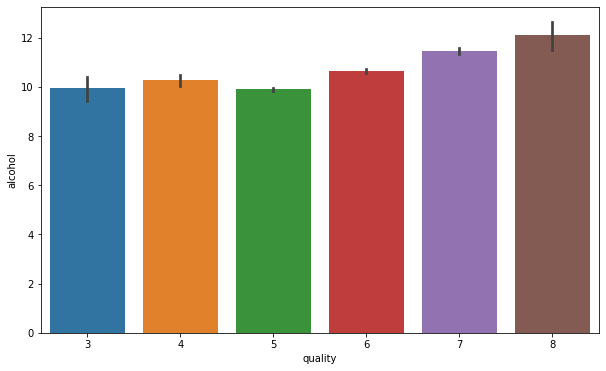

In [125]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Alcohol level also goes higher as te quality of wine increases.

# Feature Selection Using ExtraTreesClassifier


In [126]:
X=df.drop(['quality','Rate'],axis=1)
Y=df['quality']

In [127]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [128]:
print(model.feature_importances_)

[0.0790602  0.09755973 0.08122635 0.07894475 0.07635065 0.07201804
 0.10331045 0.08643106 0.07775225 0.10364362 0.1437029 ]


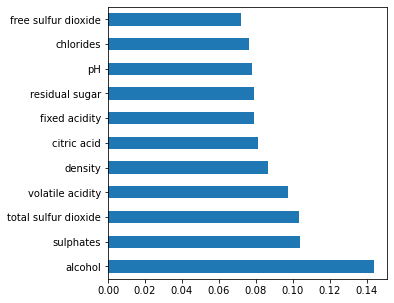

In [129]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(5,5))
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

# Feature Selection Using mutual_info_classif

In [130]:
from sklearn.feature_selection import mutual_info_classif

In [131]:
mutual_info=mutual_info_classif(X,Y)

In [132]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

alcohol                 0.179576
volatile acidity        0.119312
sulphates               0.112424
density                 0.101038
total sulfur dioxide    0.096664
chlorides               0.056203
citric acid             0.048957
fixed acidity           0.040204
residual sugar          0.031145
free sulfur dioxide     0.029175
pH                      0.018459
dtype: float64

# Considering Removing Outliers

In [133]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [134]:
df.shape

(1599, 13)

In [135]:
z.shape

(1599, 13)

In [136]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 13)
(1451, 13)


# Percentage Data Loss:

In [173]:
loss_percent=(1599-1451)/1599*100
print(loss_percent)

9.255784865540964


Here we see, with the removal of outliers its giving 9.25% of the data loss and we cannot take such a huge data loss. So we will not remove outliers.

# Splitting the data as target variable and feature variabes


In [174]:
X=df.drop(['quality','Rate'],axis=1)
Y=df['quality']

# Removing skewness

In [226]:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

# Building The Model

In [227]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Finding Best Random_State

In [228]:
maxAccu=0
BestRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=.30,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    pred_svc=svc.predict(x_test)
    acc=accuracy_score(y_test,pred_svc)
    if acc>maxAccu:
        maxAccu=acc
        BestRS=i
print("Best Accuracy is :",maxAccu,"on Random_State",BestRS)      

Best Accuracy is : 0.6604166666666667 on Random_State 12


# Train and Test splitting of data

In [229]:
X_train, X_test, y_train, y_test = train_test_split(x,Y, test_size = 0.30, random_state =12)

In [230]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Our training and testing data is ready now to perform machine learning algorithm

# Support Vector Classifier

In [231]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy Score: 0.6458333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       209
           6       0.60      0.67      0.64       199
           7       0.56      0.39      0.46        57
           8       0.00      0.00      0.00         3

    accuracy                           0.65       480
   macro avg       0.31      0.30      0.30       480
weighted avg       0.62      0.65      0.63       480



# Random Forest Classifier

In [232]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,pred_rfc))
print(classification_report(y_test, pred_rfc))


Accuracy Score 0.7104166666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.78      0.78      0.78       209
           6       0.67      0.74      0.71       199
           7       0.64      0.53      0.58        57
           8       0.00      0.00      0.00         3

    accuracy                           0.71       480
   macro avg       0.35      0.34      0.34       480
weighted avg       0.70      0.71      0.70       480



# K-Nearest Neighbors

In [233]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy Score 0.5833333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.66      0.73      0.69       209
           6       0.56      0.52      0.54       199
           7       0.45      0.44      0.44        57
           8       0.00      0.00      0.00         3

    accuracy                           0.58       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.57      0.58      0.58       480



# Cross Validation

In [234]:
cross_svc=cross_val_score(SVC(),x,Y,cv=10)
print("Cross validating score of SVC model:",cross_svc.mean())

Cross validating score of SVC model: 0.5772327044025157


In [235]:
cross_rfc=cross_val_score(RandomForestClassifier(),x,Y,cv=10)
print("Cross validating score of Random Forest Classifier model:",cross_rfc.mean())

Cross validating score of Random Forest Classifier model: 0.5772562893081761


In [236]:
cross_knn=cross_val_score(KNeighborsClassifier(),x,Y,cv=10)
print("Cross validating score of K Nearest Neighbors model:",cross_knn.mean())

Cross validating score of K Nearest Neighbors model: 0.5265683962264152


# Hyperparameter Tuning

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [239]:
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [240]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [241]:
grid_svc.best_params_


{'C': 0.9, 'gamma': 0.8, 'kernel': 'rbf'}

In [242]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C =0.9, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,pred_svc2))
print(classification_report(y_test, pred_svc2))

Accuracy Score 0.675
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.77      0.71      0.74       209
           6       0.59      0.78      0.67       199
           7       0.80      0.35      0.49        57
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.36      0.31      0.32       480
weighted avg       0.68      0.68      0.66       480



# Saving the Model

In [243]:
import joblib
joblib.dump(svc2,"Wine_Model.pkl")

['Wine_Model.pkl']